In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [5]:
imdb,info=tfds.load("imdb_reviews/subwords8k",with_info=True,as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteKQDO1C/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteKQDO1C/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteKQDO1C/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [6]:
train_data,test_data=imdb['train'],imdb['test']

In [7]:
tokenizer=info.features['text'].encoder

In [8]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [9]:
sample_string='Tensorflow, from basics to mastery'


tokenized_string=tokenizer.encode(sample_string)
print("The Tokenized String is {}  ".format(tokenized_string))

original_string=tokenizer.decode(tokenized_string)
print("The Original String is {}  ".format(original_string))

The Tokenized String is [6307, 2327, 2934, 2, 48, 4249, 4429, 7, 2652, 8050]  
The Original String is Tensorflow, from basics to mastery  


In [10]:
for ts in tokenized_string:
  print('{}---->{}'.format(ts,tokenizer.decode([ts])))

6307---->Ten
2327---->sor
2934---->flow
2---->, 
48---->from 
4249---->basi
4429---->cs 
7---->to 
2652---->master
8050---->y


In [11]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [12]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [13]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 13s 28ms/step - loss: 0.6903 - accuracy: 0.5458 - val_loss: 0.6543 - val_accuracy: 0.7225
Epoch 2/10
391/391 [==============================] - 11s 27ms/step - loss: 0.6103 - accuracy: 0.7555 - val_loss: 0.4854 - val_accuracy: 0.8261
Epoch 3/10
391/391 [==============================] - 11s 27ms/step - loss: 0.4328 - accuracy: 0.8509 - val_loss: 0.3866 - val_accuracy: 0.8503
Epoch 4/10
391/391 [==============================] - 11s 27ms/step - loss: 0.3387 - accuracy: 0.8838 - val_loss: 0.3416 - val_accuracy: 0.8698
Epoch 5/10
391/391 [==============================] - 11s 27ms/step - loss: 0.2810 - accuracy: 0.9011 - val_loss: 0.3221 - val_accuracy: 0.8731
Epoch 6/10
391/391 [==============================] - 11s 27ms/step - loss: 0.2541 - accuracy: 0.9084 - val_loss: 0.3185 - val_accuracy: 0.8720
Epoch 7/10
391/391 [==============================] - 11s 27ms/step - loss: 0.2341 - accuracy: 0.9177 - val_loss: 0.3074 - val_accuracy:

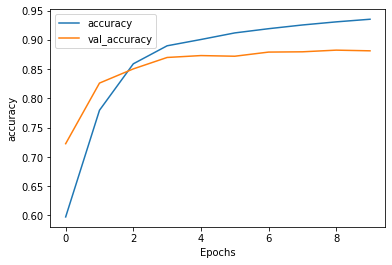

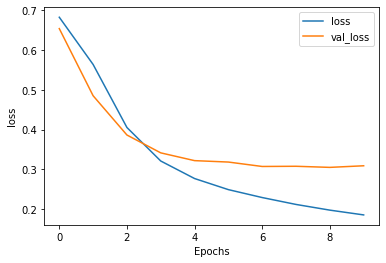

In [14]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")